# SMOTE

**Dataset:** Fashion mnist

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The classes are:

0 => T-shirt/top

1 => Trouser

2 => Pullover

3 =>Dress

4 => Coat

5 => Sandal

6 => Shirt

7 => Sneaker

8 => Bag

9 => Ankle boot

**Link to Dataset:**

https://keras.io/api/datasets/fashion_mnist/

**SMOTE Python notebook(.ipynb):**

https://colab.research.google.com/drive/1Fxl5VuBL70CxLXMGc-S8McyY7f0brVET?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from scipy.stats import norm

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


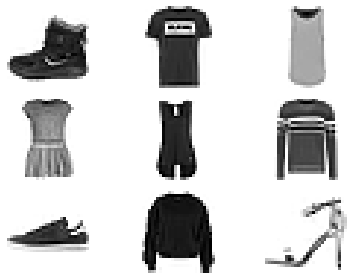

In [ ]:
from matplotlib import pyplot

(Xtr,ytr),(Xtes,ytes)=fashion_mnist.load_data()
print('Train: X=%s, y=%s' % (Xtr.shape, ytr.shape))
print('Test: X=%s, y=%s' % (Xtes.shape, ytes.shape))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(Xtr[i], interpolation='nearest', cmap='gray_r')
  plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()

Preparing the dataset

In [ ]:
Xtr=Xtr.reshape(Xtr.shape[0],784)
Xtes=Xtes.reshape(Xtes.shape[0],784)

In [ ]:
import pandas as pd

df1=pd.DataFrame(Xtr)
df1['labels']=ytr
df2=pd.DataFrame(Xtes)
df2['labels']=ytes
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,15,131,87,95,97,106,95,115,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,252,...,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,134,124,0,0,160,80,0,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,15,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,225,218,21,...,208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,153,194,206,222,223,209,201,56,0,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,17,191,159,79,85,158,191,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,65,96,107,77,...,71,66,51,67,7,0,1,0,0,0,0,0,0,0,0,0,0,11,54,55,61,65,69,67,67,66,63,66,69,66,54,50,5,0,1,0,0,0,0,0


In [ ]:
df = pd.concat([df1, df2])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
9996,0,0,0,0,0,0,0,0,0,31,52,98,94,86,94,84,53,89,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,178,196,...,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,149,59,0,0,57,137,91,0,0,0,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,30,69,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,221,229,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,99,117,135,137,135,120,101,27,0,0,0,0,0,0,0,0,0,8
9998,0,0,0,0,0,0,0,0,0,0,0,164,137,130,93,136,138,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,...,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,206,85,0,94,202,14,0,0,0,0,0,0,0,0,0,0,1


Making the balanced dataset into imbalanced dataset

In [ ]:
from collections import Counter
Counter(df['labels'])

Counter({0: 7000,
         1: 7000,
         2: 7000,
         3: 7000,
         4: 7000,
         5: 7000,
         6: 7000,
         7: 7000,
         8: 7000,
         9: 7000})

In [ ]:
from numpy.random import randint
n=7000
d=[]
for i in range(10):
  X_with_class = df[df['labels'] == i]
  if i==0 or i==4 or i==8:
    ix = randint(0, len(X_with_class), 869)
  else:
    ix = randint(0, len(X_with_class), 7000)
  print(ix)
  [d.append(X_with_class.iloc[j]) for j in ix]

[ 155 1643 4871 5483 5953 1636 3843 4503 1243 5850 3421 5938 1708  379
   19 5914 4088 5245  175 6998 2566 4712 3296 1641 5177 5353 3851 6028
 2405 5478 2972 1931 5079 1553 1563 4083 5082 5805 4238 3080 6046 1826
 4870  574 5098 5752 1318 5738 2188 1541 4468 3874 4669 2378 6171 5336
  144 2007 6014  975 6373 3424 5401 2492 2980  116 6999 3630 5577 5991
 4879 3540 2450 5330 4729 4479  552 1926  536 1929 2506 6347 4665 1534
 2983 6170  427 2195 4287 5505 1187 6704 3322   99 3716 4326 4218 1614
 1471 5902 5148 4675 5062 3539 4813 2400 4549 1961 3247 4576  237 1938
 3843 6711 2277  337 4183 1256 5307  187 4785 6078 5062 4035  211 6119
 6565 1629 2027 1788 4412 4712 6695  532  427 6054 5471 6588 6984 6253
 6362 2248 3997 3415 2092 4320 6804 3274 1414 4795 2007 1247 3901 4808
 1446 5130  497  186   88 4597 1332 6799 3016 4796 5737  195 1605 1258
 3144 4140 4969 4238 6064 2822 4143 4298 6931 2642 1083 1034 6173 1052
 6846 5525  102 1304 1753 5465 5546 2599  273 1577  652 4602 6103 4977
 6220 

In [ ]:
d=pd.DataFrame(d)
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,labels
1590,0,0,0,0,0,0,0,0,17,101,19,0,0,0,0,0,0,0,143,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,255,237,156,...,255,255,255,255,178,0,0,0,0,0,0,0,0,0,0,0,0,0,75,121,114,119,121,122,131,128,120,126,132,134,126,132,89,0,0,0,0,0,0,0
17064,0,0,0,1,0,3,0,0,0,0,22,63,0,0,0,0,57,58,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,26,73,107,120,234,...,112,81,111,152,140,0,1,0,0,0,0,0,0,0,0,1,0,11,85,62,122,74,63,112,141,110,87,107,86,89,57,38,37,0,0,0,1,0,0,0
48978,0,0,0,0,1,2,1,2,4,1,0,0,97,74,78,99,20,0,0,4,2,1,1,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,99,...,191,185,187,178,11,0,4,0,0,0,0,0,0,0,0,1,2,0,0,174,164,167,169,170,170,166,163,159,163,159,156,152,0,0,1,0,0,0,0,0
55017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,2,1,16,49,61,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59524,0,0,0,0,0,0,0,0,0,0,33,175,20,0,0,0,135,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,190,255,235,...,207,174,143,67,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
52708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,0,0,3,0,4,141,109,113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
12319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
50521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [ ]:
from collections import Counter
Counter(d['labels'])

Counter({0: 869,
         1: 7000,
         2: 7000,
         3: 7000,
         4: 869,
         5: 7000,
         6: 7000,
         7: 7000,
         8: 869,
         9: 7000})

In [ ]:
from imblearn.over_sampling import SMOTE

X=d.iloc[:,:-1]
y=d.iloc[:,-1]
oversample = SMOTE()
Xs, ys = oversample.fit_resample(X, y)

counter = Counter(ys)
print(counter)

Counter({0: 7000, 1: 7000, 2: 7000, 3: 7000, 4: 7000, 5: 7000, 6: 7000, 7: 7000, 8: 7000, 9: 7000})


In [ ]:
y.shape

(51607,)

In [ ]:
ys.iloc[44607:]

44607    9
44608    9
44609    9
44610    9
44611    9
        ..
69995    8
69996    8
69997    8
69998    8
69999    8
Name: labels, Length: 25393, dtype: uint8

Plotting the generated images by SMOTE

In [ ]:
d=Xs.iloc[44607:]
d['labels']=ys.iloc[44607:]
d.iloc[:,:-1] = d.iloc[:,:-1].astype('float32')
d.iloc[:,:-1] = (d.iloc[:,:-1] - 127.5) / 127.5
print(d.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


(25393, 785)


In [ ]:
frames = []
classes = d.labels.unique()
print(classes)

for i in classes:
    g = d[d.labels == i].sample(10)
    frames.append(g)

equally_sampled = pd.concat(frames)
print(equally_sampled)


[9 0 4 8]
         0         1         2         3  ...       781       782  783  labels
47616 -1.0 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.0       9
46530 -1.0 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.0       9
47485 -1.0 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.0       9
44790 -1.0 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.0       9
46524 -1.0 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.0       9
49259 -1.0 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.0       9
46402 -1.0 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.0       9
49557 -1.0 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.0       9
46400 -1.0 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.0       9
50835 -1.0 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.0       9
56294 -1.0 -1.000000 -0.003922  0.003922  ... -0.003922  0.003922 -1.0       0
55143 -1.0 -1.000000  0.176471 -1.000000  

In [ ]:
dd=d

(40, 28, 28)


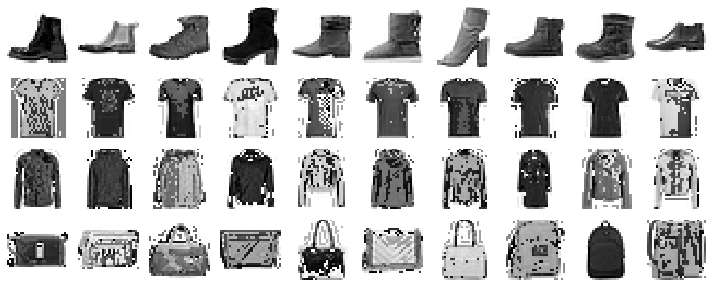

In [ ]:
d=np.array(equally_sampled.iloc[:,:-1])
d = (d + 1) / 2.0
u=d.reshape(d.shape[0],28,28)
plt.figure(figsize=(10,10))
print(u.shape)
for i in range(u.shape[0]):
  plt.subplot(10, 10, i+1)
  plt.imshow(u[i], interpolation='nearest', cmap='gray_r')
  plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()

# Decision tree classifier on the balanced fashion dataset by SMOTE

Decision tree classifier is built to compare GAN and SMOTE oversampling algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, train_size=0.8, random_state=1, stratify=ys )

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf.fit(X_train_std, y_train)
pred = clf.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != pred).sum())

from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, pred))

Misclassified examples: 1357
Accuracy: 0.903


# SMOTE for Cifar10

Dataset: Cifar10

0	=>airplane

1	=>automobile

2	=>bird

3	=>cat

4	=>deer

5	=>dog

6	=>frog

7	=>horse

8	=>ship

9	=>truck

Link to Dataset:

https://keras.io/api/datasets/cifar10/

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


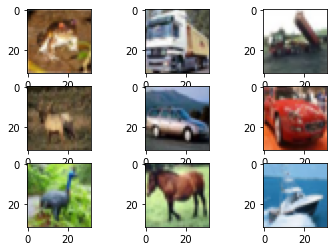

In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10
(trainX, trainy), (testX, testy) = cifar10.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i])
pyplot.show()

In [ ]:
trainX=trainX.reshape(trainX.shape[0],3072)
testX=testX.reshape(testX.shape[0],3072)

In [ ]:
import pandas as pd

df1=pd.DataFrame(trainX)
df1['labels']=trainy
df2=pd.DataFrame(testX)
df2['labels']=testy
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
0,59,62,63,43,46,45,50,48,43,68,54,42,98,73,52,119,91,63,139,107,75,145,110,80,149,117,89,149,120,93,131,103,77,125,99,76,142,115,91,144,...,148,103,77,161,105,69,144,95,55,112,90,59,119,91,58,130,96,65,120,87,59,92,67,46,103,78,57,170,140,104,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,101,99,125,131,139,155,166,180,172,190,210,180,199,214,142,156,156,111,120,110,106,107,98,109,104,102,123,121,117,127,...,5,6,11,6,6,11,10,9,12,25,22,22,51,45,42,68,64,67,90,90,101,116,113,122,134,127,133,140,130,136,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,...,76,90,90,72,86,86,64,78,78,64,78,78,69,83,83,66,80,80,55,69,69,52,66,66,58,72,72,68,80,79,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,37,23,44,39,25,40,37,22,40,38,23,24,23,9,32,25,15,43,27,19,30,20,10,32,30,17,41,37,23,52,...,122,99,67,107,85,54,112,96,66,92,81,53,80,62,39,96,78,59,77,67,42,85,76,44,84,75,48,67,57,38,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,193,211,181,196,218,177,195,220,181,195,223,184,192,223,189,190,223,189,189,222,188,193,224,183,194,223,182,194,223,184,...,93,98,102,90,95,99,88,93,97,83,89,92,77,87,88,75,84,85,71,81,82,74,80,83,72,76,79,71,75,78,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,173,203,153,173,201,153,172,201,157,177,205,161,180,210,161,180,212,161,180,212,162,181,213,165,184,216,164,183,215,163,...,51,56,75,49,55,72,50,56,72,50,56,72,46,52,68,44,48,64,44,46,61,46,48,63,42,44,59,40,42,57,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,251,138,254,251,138,254,248,135,254,242,130,253,239,128,254,241,129,254,244,131,254,244,132,254,243,129,253,240,127,254,...,244,168,61,247,171,65,237,157,55,240,160,57,245,167,61,246,169,64,249,176,68,248,171,64,245,174,76,249,175,82,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,180,239,43,181,237,45,180,237,48,181,238,51,181,239,53,183,241,56,183,241,58,182,242,59,182,242,58,183,240,61,...,47,71,97,53,77,102,52,73,96,46,68,91,45,68,94,50,77,104,50,77,103,45,71,96,42,68,93,36,62,87,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,207,235,182,206,234,181,205,232,180,204,232,180,204,233,181,205,235,180,204,234,179,202,233,180,202,232,183,202,229,185,...,114,112,103,142,141,130,164,162,149,175,171,160,184,177,166,190,181,171,190,182,171,193,186,172,192,185,169,190,182,165,195,184,169,196,189,171,195,190,171,1


In [ ]:
df = pd.concat([df1, df2])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
0,59,62,63,43,46,45,50,48,43,68,54,42,98,73,52,119,91,63,139,107,75,145,110,80,149,117,89,149,120,93,131,103,77,125,99,76,142,115,91,144,...,148,103,77,161,105,69,144,95,55,112,90,59,119,91,58,130,96,65,120,87,59,92,67,46,103,78,57,170,140,104,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,101,99,125,131,139,155,166,180,172,190,210,180,199,214,142,156,156,111,120,110,106,107,98,109,104,102,123,121,117,127,...,5,6,11,6,6,11,10,9,12,25,22,22,51,45,42,68,64,67,90,90,101,116,113,122,134,127,133,140,130,136,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,...,76,90,90,72,86,86,64,78,78,64,78,78,69,83,83,66,80,80,55,69,69,52,66,66,58,72,72,68,80,79,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,37,23,44,39,25,40,37,22,40,38,23,24,23,9,32,25,15,43,27,19,30,20,10,32,30,17,41,37,23,52,...,122,99,67,107,85,54,112,96,66,92,81,53,80,62,39,96,78,59,77,67,42,85,76,44,84,75,48,67,57,38,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,193,211,181,196,218,177,195,220,181,195,223,184,192,223,189,190,223,189,189,222,188,193,224,183,194,223,182,194,223,184,...,93,98,102,90,95,99,88,93,97,83,89,92,77,87,88,75,84,85,71,81,82,74,80,83,72,76,79,71,75,78,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,81,130,75,80,131,76,81,134,76,81,136,76,82,136,76,83,137,78,85,141,81,88,142,81,87,140,81,86,141,80,...,234,246,244,222,235,237,216,229,236,203,217,228,156,171,185,146,160,177,194,207,223,216,228,239,222,233,239,211,224,235,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,80,64,108,85,67,110,90,79,80,96,116,84,100,126,88,104,126,90,114,138,92,117,144,90,117,140,96,107,127,111,...,174,171,167,176,157,138,199,178,158,182,152,126,176,139,107,159,146,143,157,154,155,156,156,156,156,159,160,185,177,173,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,14,11,14,13,10,13,12,9,12,11,8,11,10,7,10,9,6,9,8,5,8,6,6,8,6,7,7,5,6,6,...,179,138,120,157,123,111,141,129,122,127,122,114,121,117,112,62,56,68,28,23,50,29,25,52,28,24,52,27,23,51,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,28,14,23,26,13,51,49,34,74,73,54,91,89,65,114,114,79,137,138,101,90,92,70,32,35,25,16,20,16,9,...,111,141,92,114,145,97,108,141,90,107,140,87,103,137,84,103,136,83,103,137,84,95,131,79,92,129,78,92,126,78,93,124,80,95,123,81,92,120,80,1


In [ ]:
from collections import Counter
Counter(df['labels'])

Counter({0: 6000,
         1: 6000,
         2: 6000,
         3: 6000,
         4: 6000,
         5: 6000,
         6: 6000,
         7: 6000,
         8: 6000,
         9: 6000})

In [ ]:
from numpy.random import randint
n=6000
d=[]
for i in range(10):
  X_with_class = df[df['labels'] == i]
  ix = randint(0, len(X_with_class), n)
  print(ix)
  [d.append(X_with_class.iloc[j]) for j in ix]
  n=n-500

[4838 1597 5080 ...  111  486 3154]
[2536 2783 1571 ...  580 2140 4721]
[5596  139 5553 ... 4788  202 1478]
[3796 4783 2238 ...  131  553 3445]
[4042 5117  858 ... 1409 5200 1734]
[2582 5098  998 ...  123 2224 1479]
[5446 4755  426 ... 3180  846  277]
[  91 2847 1804 ... 2211 2482 2046]
[1177 1705 4706 ... 4536 2016 1110]
[1310  439  190 ...  255 1872 5768]


In [ ]:
d=pd.DataFrame(d)
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
48289,26,31,23,26,31,23,26,31,23,27,32,24,27,32,25,27,32,24,27,32,24,26,32,24,26,31,24,26,31,23,27,32,24,27,32,24,27,32,25,28,...,73,66,40,74,67,40,77,69,42,74,66,38,74,66,38,71,63,36,69,61,34,70,62,35,66,58,31,63,56,29,63,58,34,61,57,33,67,62,38,0
16056,76,110,159,77,111,159,78,112,160,78,112,160,79,113,162,80,114,163,80,114,163,82,116,164,83,117,165,83,118,166,84,118,166,84,118,167,84,118,167,84,...,93,129,174,92,128,174,91,127,172,90,126,172,90,126,171,90,125,170,89,123,169,89,123,169,88,122,168,88,121,167,86,119,166,85,118,164,85,117,164,0
814,135,133,146,129,127,140,139,136,150,141,139,149,148,148,150,157,157,159,137,136,148,142,136,156,155,145,161,154,145,153,144,134,145,145,136,155,143,138,153,141,...,100,101,79,100,102,78,99,102,76,99,102,75,97,99,72,96,98,73,95,97,74,94,96,72,91,93,70,86,88,65,80,84,58,73,76,50,73,76,50,0
33058,146,135,126,153,135,127,169,156,145,161,149,138,162,147,135,166,152,141,160,144,143,161,145,143,157,144,128,157,143,128,155,141,127,150,136,128,147,133,142,148,...,89,68,83,84,61,70,89,65,74,99,74,83,108,86,84,106,86,70,88,71,47,73,58,36,68,56,36,67,57,39,77,63,41,93,69,38,96,72,41,0
25546,232,239,242,219,231,243,208,224,244,198,219,243,188,209,241,183,202,243,181,201,242,194,208,242,218,222,248,214,216,244,212,213,244,216,218,248,209,215,241,207,...,138,114,80,132,108,79,135,111,85,131,107,81,122,98,72,121,97,72,125,101,77,117,93,69,115,91,67,124,101,76,126,106,79,126,106,79,125,105,78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,181,201,230,179,198,230,182,201,230,185,206,229,184,204,228,187,204,227,187,203,230,165,189,224,154,183,224,156,184,225,155,182,223,155,180,221,157,182,223,154,...,46,77,100,46,76,103,47,77,104,47,77,102,49,77,99,49,77,98,48,76,97,48,76,97,48,76,99,45,75,101,45,76,102,45,76,102,46,76,103,9
35592,251,251,251,250,250,250,252,252,252,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,252,253,252,252,252,252,252,252,252,252,252,252,252,252,252,252,...,152,154,143,154,155,144,154,156,143,154,156,142,155,158,141,157,161,140,148,152,129,143,146,128,147,149,136,140,142,128,128,130,116,149,151,137,149,151,137,9
2531,207,228,255,207,227,253,209,230,254,211,231,254,213,232,255,214,233,255,215,234,255,215,235,255,217,236,255,219,236,254,222,237,254,223,238,253,228,242,254,236,...,102,92,100,100,91,99,99,90,98,99,90,99,101,92,99,100,92,99,99,93,99,99,95,101,98,94,101,95,92,99,93,90,97,93,90,97,93,90,98,9
19114,141,145,141,145,147,144,150,151,148,152,153,150,159,160,155,158,159,153,158,159,153,160,161,156,161,162,157,159,161,156,158,160,155,159,161,156,160,162,157,162,...,173,172,170,172,171,169,172,171,169,171,170,168,170,169,167,169,169,169,169,169,169,169,169,169,169,169,169,167,167,168,165,166,168,164,165,167,161,162,164,9


In [ ]:
Counter(d['labels'])

Counter({0: 6000,
         1: 5500,
         2: 5000,
         3: 4500,
         4: 4000,
         5: 3500,
         6: 3000,
         7: 2500,
         8: 2000,
         9: 1500})

In [ ]:
from imblearn.over_sampling import SMOTE

X=d.iloc[:,:-1]
y=d.iloc[:,-1]
oversample = SMOTE()
Xs, ys = oversample.fit_resample(X, y)

counter = Counter(ys)
print(counter)

Counter({0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000})


In [ ]:
y.shape

(37500,)

In [ ]:
d2=Xs.iloc[37500:]
d2['labels']=ys.iloc[37500:]
d2.iloc[:,:-1] = d2.iloc[:,:-1].astype('float32')
d2.iloc[:,:-1] = (d2.iloc[:,:-1] - 127.5) / 127.5
print(d2.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


(22500, 3073)


In [ ]:
frames = []
classes = d2.labels.unique()
print(classes)

for i in classes:
    g = d2[d2.labels == i].sample(10)
    frames.append(g)

equally_sampled = pd.concat(frames)
print(equally_sampled)


[1 2 3 4 5 6 7 8 9]
              0         1         2  ...      3070      3071  labels
37668 -0.756863 -0.772549 -0.686275  ...  0.443137  0.498039       1
37905  1.000000  1.000000  1.000000  ...  1.000000  1.000000       1
37810 -1.000000  0.992157 -1.000000  ... -0.192157 -0.254902       1
37726  0.035294  0.286275  0.662745  ... -0.215686 -0.200000       1
37529  0.207843  0.498039  0.756863  ...  0.356863  0.301961       1
...         ...       ...       ...  ...       ...       ...     ...
59681 -0.082353 -0.082353 -0.074510  ... -0.552941 -0.545098       9
59688  0.670588  0.678431  0.686275  ... -0.176471 -0.160784       9
58523  0.694118  0.717647  0.741176  ...  0.003922 -0.176471       9
58800 -0.058824 -0.058824 -0.050980  ... -0.184314 -0.341176       9
58563  0.192157  0.317647  0.333333  ... -0.278431 -0.709804       9

[90 rows x 3073 columns]


(90, 32, 32, 3)


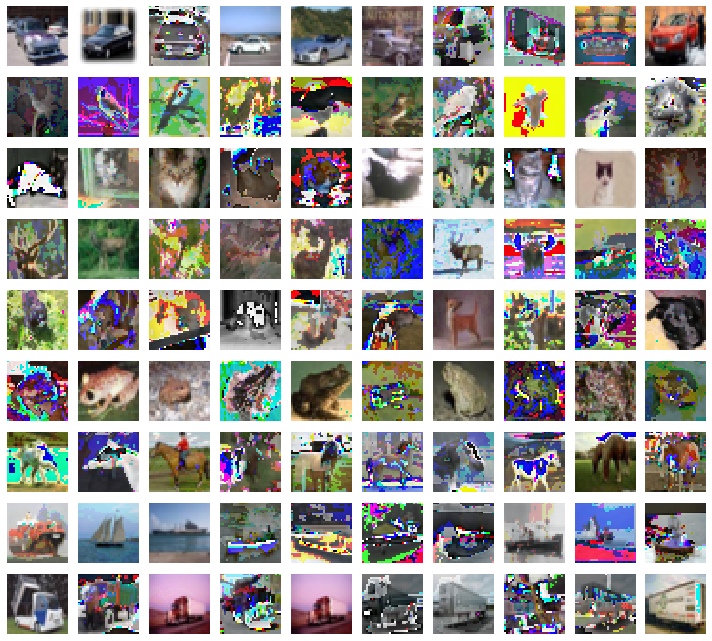

In [ ]:
import numpy as np

d2=np.array(equally_sampled.iloc[:,:-1])
d2 = (d2 + 1) / 2.0
u=d2.reshape(d2.shape[0],32,32,3)
plt.figure(figsize=(10,10))
print(u.shape)
for i in range(u.shape[0]):
  plt.subplot(10, 10, i+1)
  plt.imshow(u[i], interpolation='nearest', cmap='gray_r')
  plt.axis('off')
plt.tight_layout()
plt.show()
plt.close()